In [ ]:
# Statistics for Data Science
# Lecture 2
# In-class assignment 2.2
# Empirical distributions and fitting distributions

# If needed install packages first

# %% Load package
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats     # so we don't have to type scipy. in front of stats
import pandas as pd

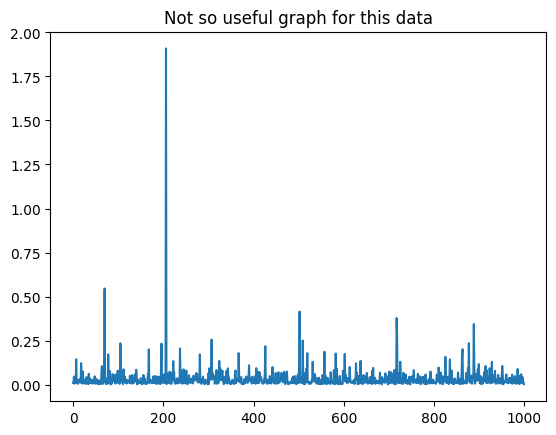

In [4]:
#%% Some examples to get started
## Create some random data 
d = np.exp(-4 + stats.norm.rvs(size=1000) )
#%% Inspect this data 
# Note that there is no need to create a data frame, we can use the matplotlib.pyplot functions directly
plt.plot(d)
plt.title("Not so useful graph for this data")
plt.show()



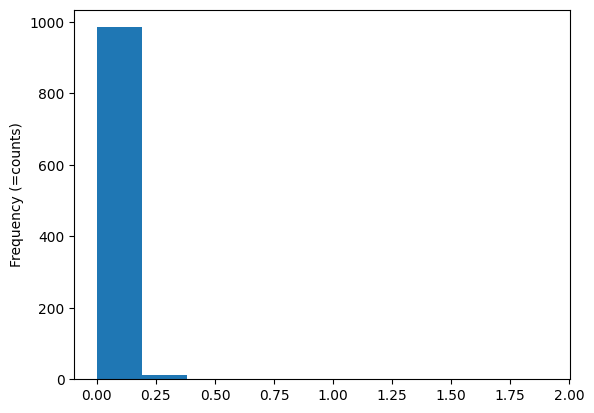

In [5]:
plt.hist(d)
plt.ylabel("Frequency (=counts)")
plt.show()



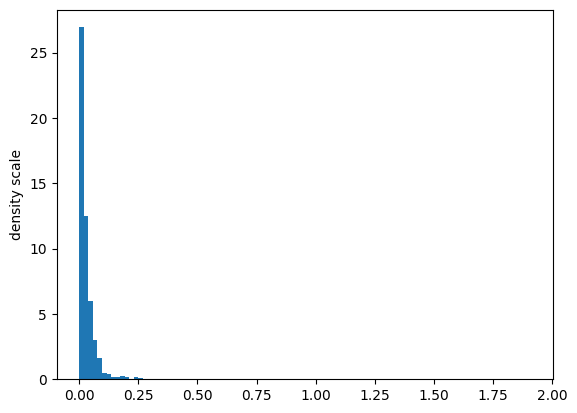

In [6]:
plt.hist(d, density=True, bins=100)
plt.ylabel("density scale")
plt.show()

FitParams(loc=np.float64(0.03341699634323307), scale=np.float64(0.07317272111627586))


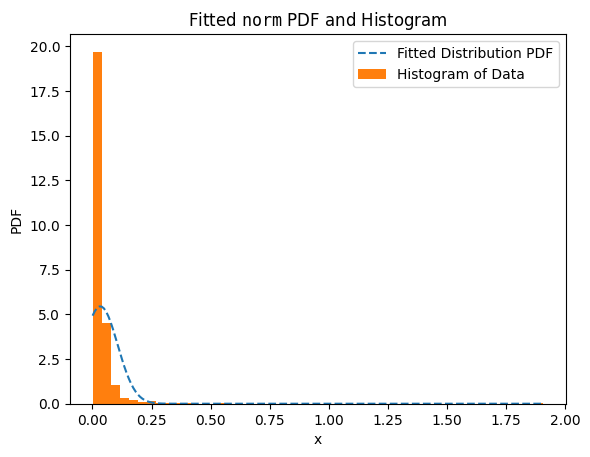

=> Not so good fit


In [7]:
#%% Fit normal distribution
# We need to define the range of values where we want to search for the best fit
bounds = {'loc': (-4,4), 'scale': (0.0001,1)}
# Fit the normal distribution to data d within these bounds
res_norm = stats.fit(stats.norm, d, bounds)
# Print and plot the results
print(res_norm.params)
res_norm.plot()
plt.show()
print("=> Not so good fit")

FitParams(s=np.float64(1.0), loc=np.float64(0.0), scale=np.float64(0.018780859308016703))


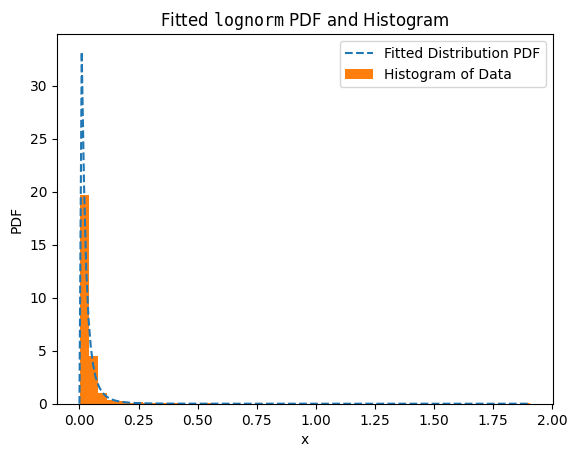

=> this is a much better fit


In [8]:
#%% Fit lognormal distribution
bounds = {'scale': (0,1), 's':(0.0001, 1)}
res_lognorm = stats.fit(stats.lognorm, d, bounds)
print(res_lognorm.params)
res_lognorm.plot()
plt.show()
print("=> this is a much better fit")

  params: FitParams(loc=np.float64(0.0), scale=np.float64(0.033416927004287986))
 success: True
 message: 'Optimization terminated successfully.'


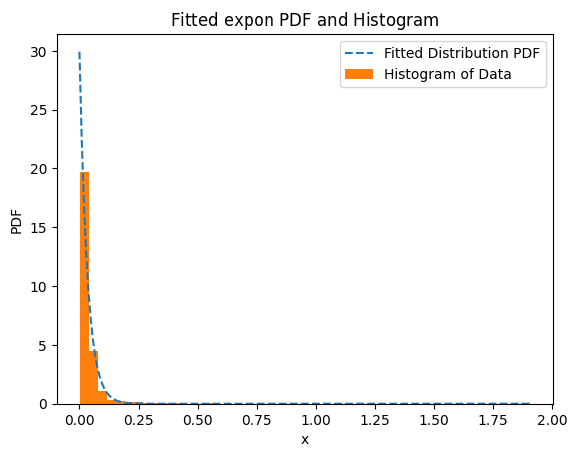

=> not too bad, but not a really good fit


In [9]:
#%% Fit exponential distribution
bounds = {'scale': (0.0001,1)}
res_exp = stats.fit(stats.expon, d, bounds)
print(res_exp)
res_exp.plot()
plt.show()
print("=> not too bad, but not a really good fit")

In [10]:
#%% Compare using negative log likelihood values (low is good)
print(res_norm.nllf(), res_lognorm.nllf(), res_exp.nllf())
print("=> Second (Log normal) is best (=lowest)")

-1195.9934849506972 -2527.970685548308 -2398.692572504422
=> Second (Log normal) is best (=lowest)


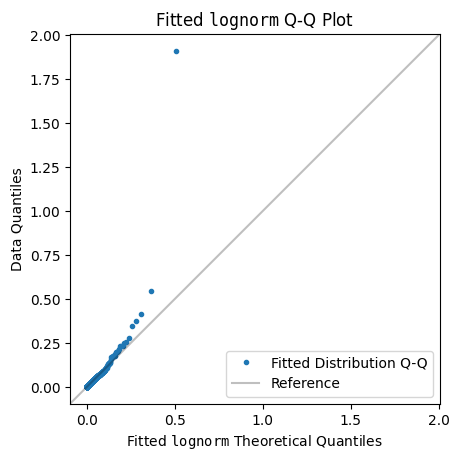

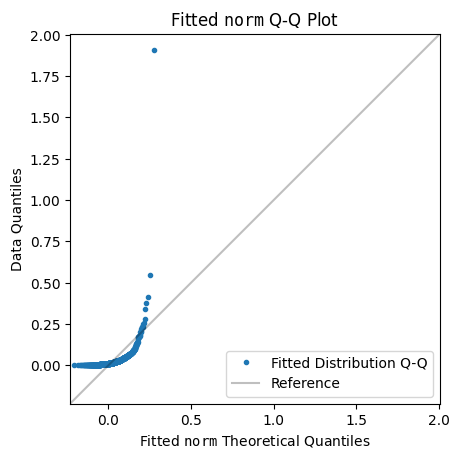

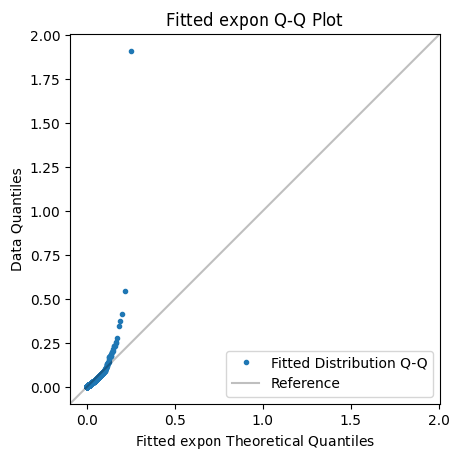

=> also here log normal is best


In [11]:
#%% Compare using plot_type{“hist”, “qq”, “pp”, “cdf”}
res_lognorm.plot(plot_type="qq")
plt.show()
res_norm.plot(plot_type="qq")
plt.show()
res_exp.plot(plot_type="qq")
plt.show()
print("=> also here log normal is best")


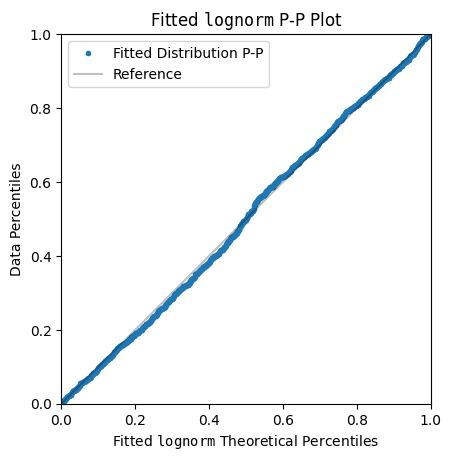

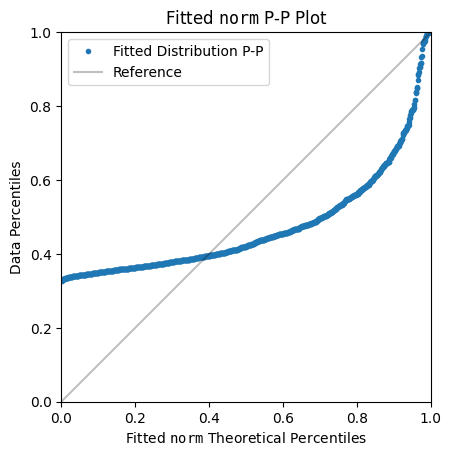

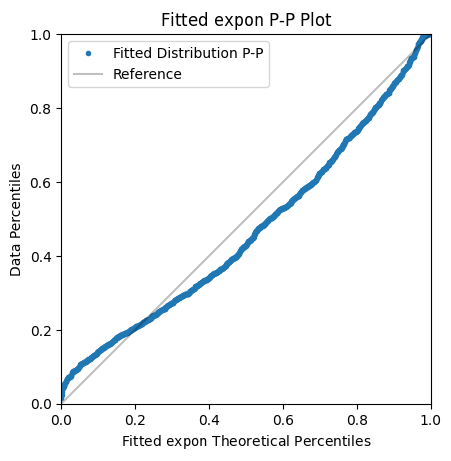

In [12]:
#%% Compare using plot_type{“hist”, “qq”, “pp”, “cdf”}
res_lognorm.plot(plot_type="pp")
plt.show()
res_norm.plot(plot_type="pp")
plt.show()
res_exp.plot(plot_type="pp")
plt.show()

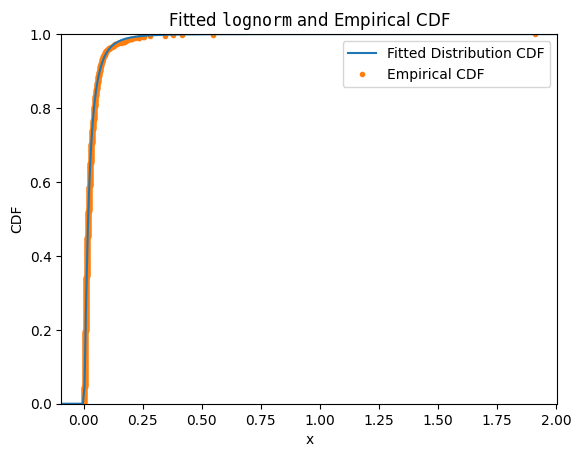

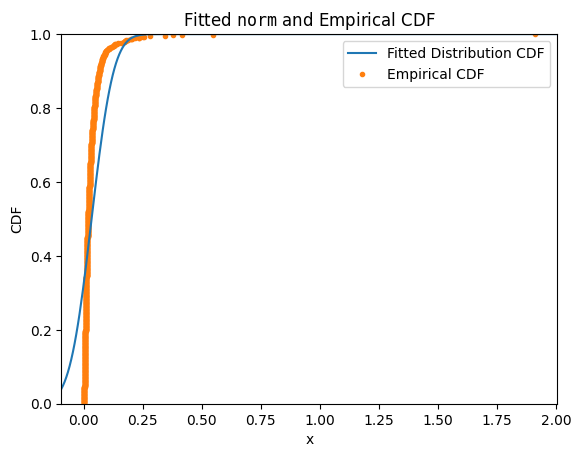

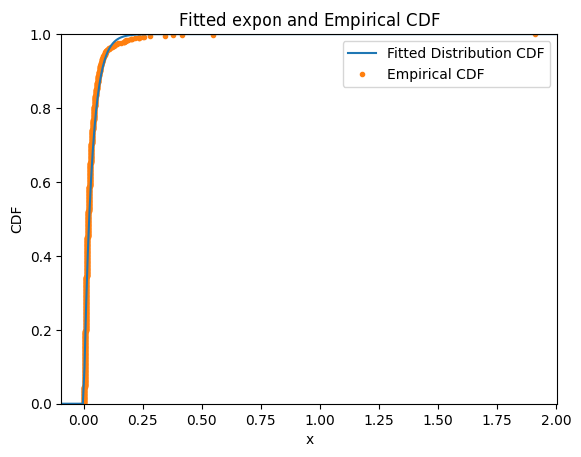

In [16]:
#%% Compare using plot_type{“hist”, “qq”, “pp”, “cdf”}
res_lognorm.plot(plot_type="cdf")
plt.show()
res_norm.plot(plot_type="cdf")
plt.show()
res_exp.plot(plot_type="cdf")
plt.show()

In [14]:
#######################
#  The assignments:   #
#######################

#%% Load the houseprice data
df = pd.read_csv('houseprice.csv')
df.head()

,Unnamed: 0,airco,bathrms,bedrooms,driveway,fullbase,garagepl,gashw,lotsize,prefarea,price,recroom,stories
0,1,0,1,3,1,1,1,0,5850,0,42000,0,2
1,2,0,1,2,1,0,0,0,4000,0,38500,0,1
2,3,0,1,3,1,0,0,0,3060,0,49500,0,1
3,4,0,1,3,1,0,0,0,6650,0,60500,1,2
4,5,0,1,2,1,0,0,0,6360,0,61000,0,1


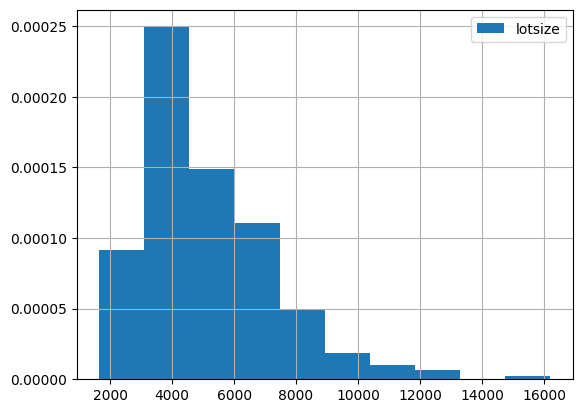

In [15]:
# %% Use hist() to show the empirical density of lotsize 
df.lotsize.hist(density=True, label="lotsize")
plt.legend()
plt.show()

FitParams(loc=np.float64(5150.12076317273), scale=np.float64(2166.21709888492))


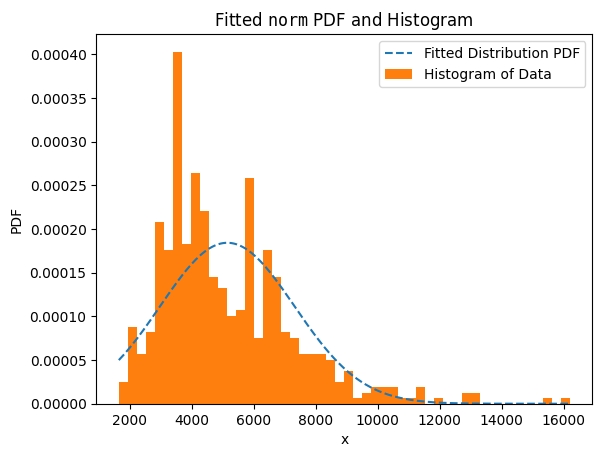

In [18]:
#%% Fit a normal distribution to the lotsize and graphically inspect the fit
bounds = {"loc": (0,df.lotsize.max()), "scale": (0,10000)}
res_norm = stats.fit(stats.norm, df.lotsize, bounds)
print(res_norm.params)
res_norm.plot()
plt.show()

FitParams(s=np.float64(0.3981258937834389), loc=np.float64(0.0), scale=np.float64(4855.465905060239))


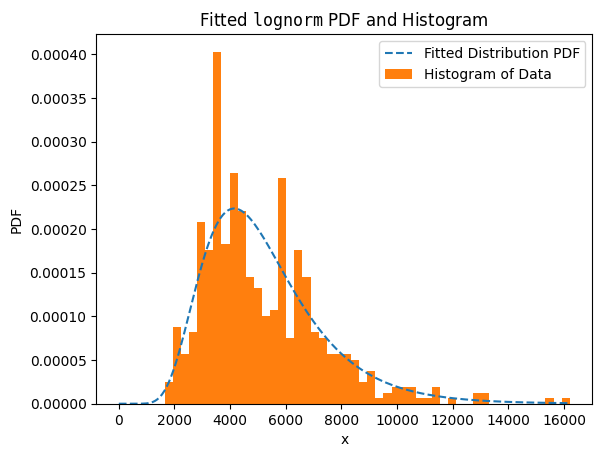

In [19]:
#%% Fit a log-normal distribution to the lotsize and graphically inspect the fit
bounds = {'scale': (0,df.lotsize.max()), 's':(0, 1)}
res_lognorm = stats.fit(stats.lognorm, df.lotsize, bounds)
print(res_lognorm.params)
res_lognorm.plot()
plt.show()

4968.411912800032 4894.6613344871075


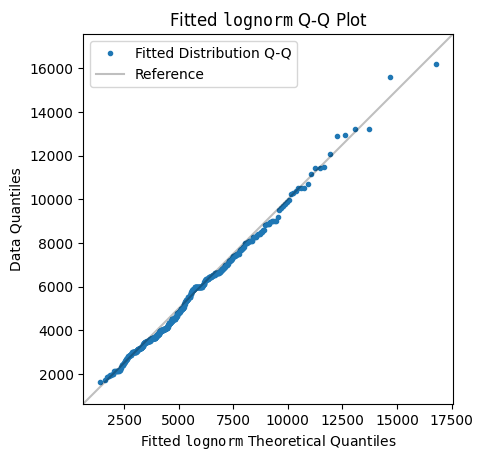

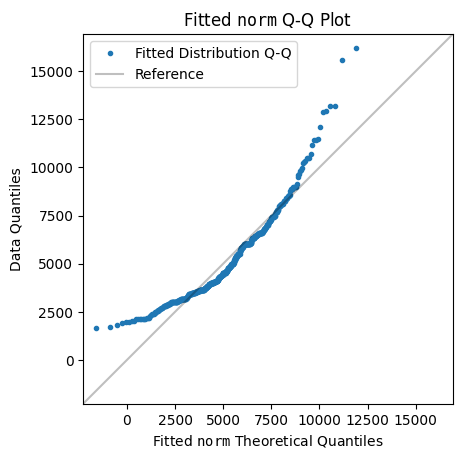

=> the log normal distribution has a better fit


In [20]:
#%% Which one fits better?
print(res_norm.nllf(), res_lognorm.nllf())
res_lognorm.plot(plot_type="qq")
plt.show()
res_norm.plot(plot_type="qq")
plt.show()
print("=> the log normal distribution has a better fit")